In [1]:
library(reticulate)
library(Seurat)
library(Signac)
library(SingleCellExperiment)
library(stringr)

Attaching SeuratObject

Attaching sp

Lade nötiges Paket: SummarizedExperiment

Lade nötiges Paket: MatrixGenerics

Lade nötiges Paket: matrixStats


Attache Paket: ‘MatrixGenerics’


Die folgenden Objekte sind maskiert von ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedians, rowMins,
    rowOrderStats, rowProds, rowQu

In [2]:
celltype_annotations = read.csv("/Users/dominik.klein/data/cell_type_annotations.csv")

In [3]:
seurat <- readRDS("/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets_seurat_jointPeaks_sctNormalized_wnn.rds")

In [4]:
seurat

An object of class Seurat 
527734 features across 16978 samples within 4 assays 
Active assay: SCT (18749 features, 1986 variable features)
 3 other assays present: RNA, ATAC, peaks
 6 dimensional reductions calculated: pca, umap.rna, lsi, umap.atac, umap, spca

In [62]:
Fragments(seurat[["ATAC"]])

[[1]]
A Fragment object for 9852 cells

[[2]]
A Fragment object for 7126 cells


In [64]:
DefaultAssay(seurat) <- "ATAC"

# call peaks using MACS2
peaks <- CallPeaks(seurat, assay="ATAC", groupby="celltype_new", macs2.path= "/Users/dominik.klein/opt/anaconda3/envs/mm_best_muon_full/bin/macs2", outdir="/Users/dominik.klein/data")


Warning message in file(file, "rt"):
“kann Datei '/Users/dominik.klein/data/NVF_peaks.narrowPeak' nicht öffnen: No such file or directory”


ERROR: Error in file(file, "rt"): kann Verbindung nicht öffnen


In [5]:
install.packages("anndata")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [ ]:
#reticulate::install_miniconda(force=TRUE)
#anndata::install_anndata()

In [7]:
slotNames(seurat)

[1] "assays"       "meta.data"    "active.assay" "active.ident" "graphs"      
 [6] "neighbors"    "reductions"   "images"       "project.name" "misc"        
[11] "version"      "commands"     "tools"

In [8]:
df_str <- str_split(celltype_annotations$X, '-', simplify=TRUE)

In [9]:
str_helper <- function(x){
    if (x[3]=="0"){
        prefix="E14-5"
        }
    else{
        prefix="E15-5"
        }
    return(paste(prefix, "_", x[1], "-1", sep=""))}

In [10]:
renamed_str = apply(df_str, 1, str_helper)

In [11]:
rownames(celltype_annotations) <- renamed_str

In [12]:
celltype_annotations$X <- NULL

In [14]:
new_metadata <- merge(x=seurat@meta.data, y=celltype_annotations, by='row.names', sort=FALSE)

In [15]:
seurat@meta.data <- new_metadata

In [54]:
rownames(seurat@meta.data) <- seurat@meta.data[['Row.names']]

In [50]:
DefaultAssay(seurat) <- 'peaks'

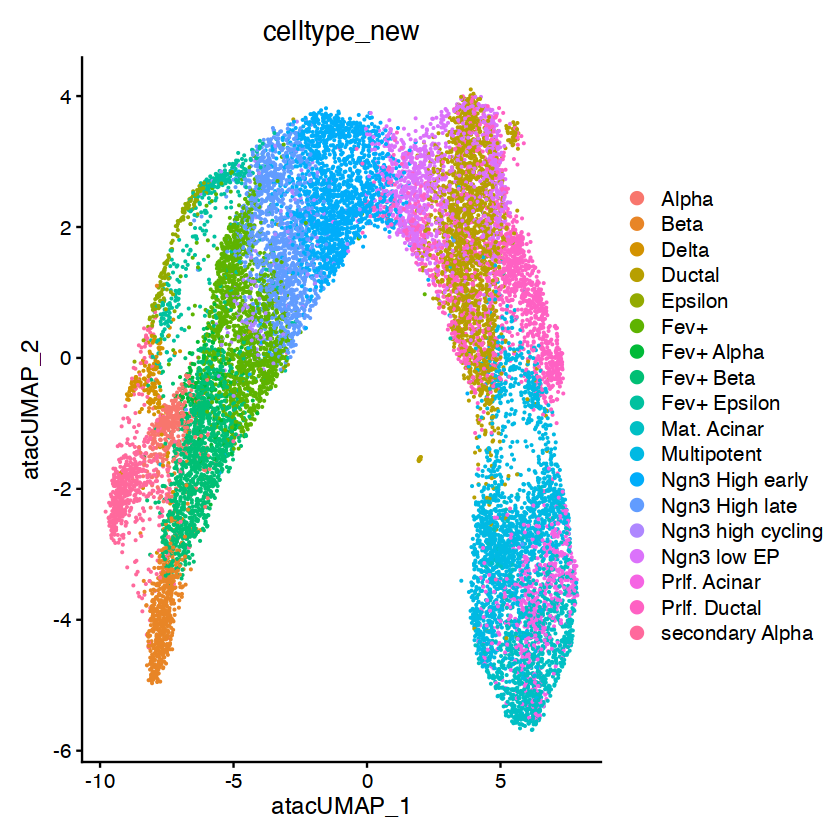

In [59]:
DimPlot(
  object = seurat,
  group.by="celltype_new"
) 

In [60]:
DefaultAssay(seurat) <- 'ATAC'

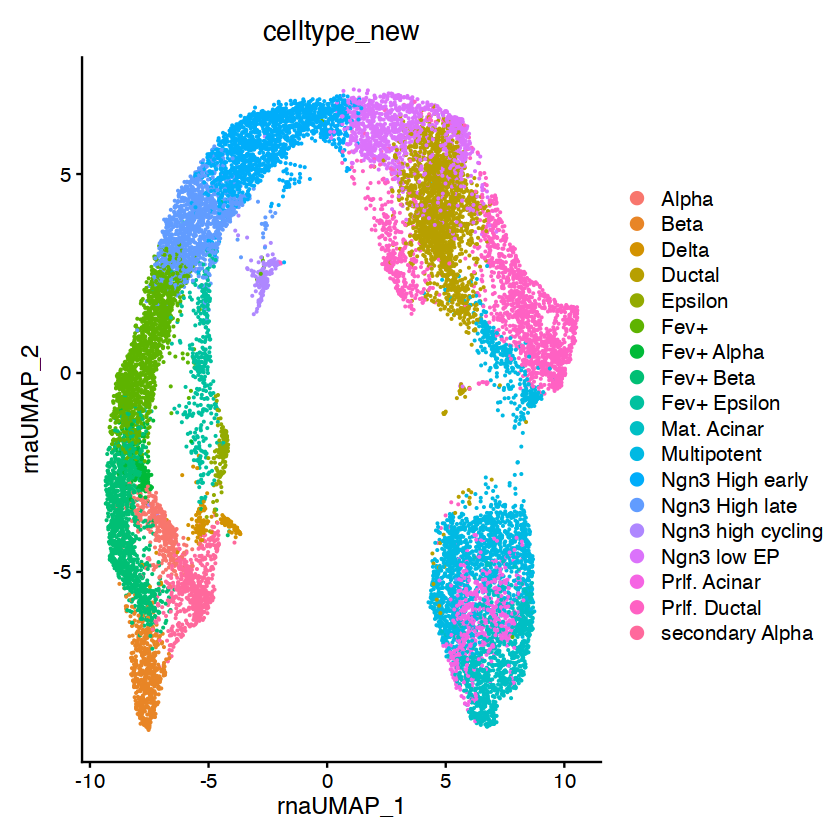

In [66]:
DimPlot(
  object = seurat,
  group.by=c("celltype_new")
) 

In [83]:
slotNames(seurat)

[1] "assays"       "meta.data"    "active.assay" "active.ident" "graphs"      
 [6] "neighbors"    "reductions"   "images"       "project.name" "misc"        
[11] "version"      "commands"     "tools"

In [86]:
DefaultAssay(seurat) <- "ATAC"
seurat <- RunTFIDF(seurat)
seurat <- FindTopFeatures(seurat, min.cutoff = 'q0')
seurat <- RunSVD(seurat)
seurat <- RunUMAP(seurat, reduction = 'lsi', dims = 2:50, reduction.name = "umap.atac", reduction.key = "CR_peaks_UMAP_")

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
14:18:32 UMAP embedding parameters a = 0.9922 b = 1.112

14:18:32 Read 16978 rows and found 49 numeric columns

14:18:32 Using Annoy for neighbor search, n_neighbors = 30

14:18:32 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:18:34 Writing NN index file to temp file /var/folders/nv/23yzkl2x1gd0mhpjqgpm0f4hqc8gvy/T//RtmpTke29q/file121b63f82e533

14:18:34 Searching Annoy index using 1 thread, search_k = 3000

14:18

In [87]:
DefaultAssay(seurat) <- "peaks"
seurat <- RunTFIDF(seurat)
seurat <- FindTopFeatures(seurat, min.cutoff = 'q0')
seurat <- RunSVD(seurat)
seurat <- RunUMAP(seurat, reduction = 'lsi', dims = 2:50, reduction.name = "umap.atac", reduction.key = "CR_peaks_UMAP_")

Performing TF-IDF normalization

Running SVD

Scaling cell embeddings

14:22:19 UMAP embedding parameters a = 0.9922 b = 1.112

14:22:19 Read 16978 rows and found 49 numeric columns

14:22:19 Using Annoy for neighbor search, n_neighbors = 30

14:22:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:22:21 Writing NN index file to temp file /var/folders/nv/23yzkl2x1gd0mhpjqgpm0f4hqc8gvy/T//RtmpTke29q/file121b62a9597d8

14:22:21 Searching Annoy index using 1 thread, search_k = 3000

14:22:25 Annoy recall = 100%

14:22:26 Commencing smooth kNN distance calibration using 1 thread

14:22:27 Initializing from normalized Laplacian + noise

14:22:28 Commencing optimization for 200 epochs, with 674068 positive edges

14:22:38 Optimization finished

Warning message:
“Keys shou

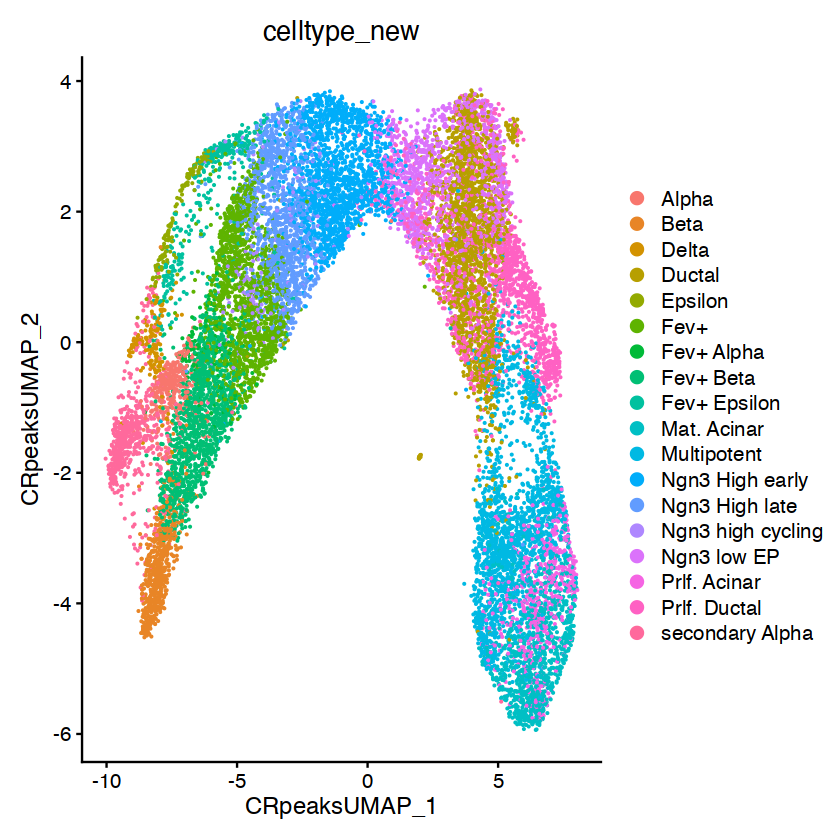

In [88]:
DimPlot(
  object = seurat,
  group.by="celltype_new"
) 

In [89]:
DefaultAssay(seurat) <- "ATAC"

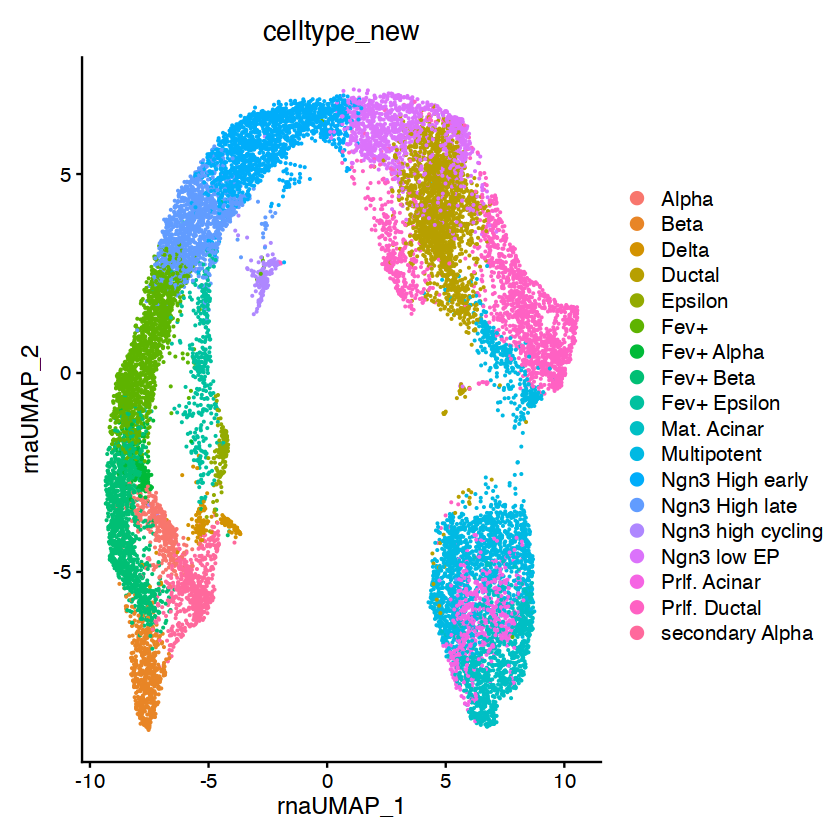

In [90]:
DimPlot(
  object = seurat,
  group.by="celltype_new"
) 

In [55]:
seurat[[]]

,Row.names,orig.ident,nCount_RNA,nFeature_RNA,nCount_ATAC,nFeature_ATAC,nucleosome_signal,nucleosome_percentile,TSS.enrichment,TSS.percentile,⋯,final_doublets,final_doublets_cat,nCount_peaks,nFeature_peaks,nCount_SCT,nFeature_SCT,SCT.weight,peaks.weight,sample,celltype_new
,<I<chr>>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<chr>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<chr>,<chr>
E14-5_AAACAGCCAACAGCCT-1,E14-5_AAACAGCCAACAGCCT-1,NVF-E14.5,8426,3668,25556,11072,0.9622490,0.90,6.345675,0.80,⋯,FALSE,False,14264,11029,8457,3651,0.6076591,0.39234086,E14-5,Fev+ Beta
E14-5_AAACAGCCAACCCTCC-1,E14-5_AAACAGCCAACCCTCC-1,NVF-E14.5,6233,3129,43666,17226,0.6815174,0.12,7.111463,0.96,⋯,FALSE,False,24011,17126,7841,3120,0.5000000,0.50000000,E14-5,Fev+ Alpha
E14-5_AAACAGCCACCTGTAA-1,E14-5_AAACAGCCACCTGTAA-1,NVF-E14.5,18378,5017,35925,13770,0.7495211,0.32,6.599997,0.89,⋯,FALSE,False,19875,13636,9492,3938,0.5167706,0.48322944,E14-5,Multipotent
E14-5_AAACAGCCACTAAGCC-1,E14-5_AAACAGCCACTAAGCC-1,NVF-E14.5,7217,3329,35568,14990,0.9050795,0.81,5.978800,0.55,⋯,FALSE,False,20336,14985,7915,3318,0.5740804,0.42591963,E14-5,Fev+ Beta
E14-5_AAACAGCCAGGATAAC-1,E14-5_AAACAGCCAGGATAAC-1,NVF-E14.5,9434,3679,10507,5184,0.6479401,0.07,5.762530,0.36,⋯,FALSE,False,5917,5298,9193,3666,0.6660723,0.33392770,E14-5,Ngn3 High early
E14-5_AAACAGCCATAAAGCA-1,E14-5_AAACAGCCATAAAGCA-1,NVF-E14.5,8056,3412,25270,11262,0.7347561,0.27,5.770973,0.37,⋯,FALSE,False,14365,11488,8266,3403,0.5000000,0.50000000,E14-5,Fev+ Epsilon
E14-5_AAACATGCAAGGTAAC-1,E14-5_AAACATGCAAGGTAAC-1,NVF-E14.5,9001,3434,38151,16034,0.8689516,0.73,5.109528,0.03,⋯,FALSE,False,21711,16068,8922,3420,0.4454870,0.55451296,E14-5,Ngn3 High early
E14-5_AAACATGCAAGGTGGC-1,E14-5_AAACATGCAAGGTGGC-1,NVF-E14.5,7024,3100,30073,12382,0.6086698,0.03,5.387765,0.11,⋯,FALSE,False,16987,12309,7985,3095,0.4622642,0.53773583,E14-5,Ngn3 High early
E14-5_AAACATGCACTAGGTC-1,E14-5_AAACATGCACTAGGTC-1,NVF-E14.5,12580,4514,44337,17648,1.0061162,0.94,5.990843,0.56,⋯,FALSE,False,25476,17500,9691,4486,0.5382196,0.46178044,E14-5,Multipotent


In [46]:
dimplot1 <- DimPlot(object = seurat, label = TRUE) + NoLegend()

ERROR: Error: Must request at least one colour from a hue palette.


In [45]:
FeaturePlot(
  object = seurat,
  features = 'nCount_RNA')

Warning message in FeaturePlot(object = seurat, features = "nCount_RNA"):
“All cells have the same value (NA) of nCount_RNA.”


ERROR: Error in if (unique.feature.exp == 0) {: Fehlender Wert, wo TRUE/FALSE nötig ist


In [17]:
X = t(seurat[['ATAC']]@data)

In [18]:
adata <- anndata::AnnData(X = X)

In [19]:
adata$obs = seurat@meta.data

In [20]:
adata$write_h5ad("/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets_cellranger_peaks.h5ad",
                compression = "gzip")

None

In [22]:
slotNames(seurat[['ATAC']])

[1] "ranges"             "motifs"             "fragments"         
 [4] "seqinfo"            "annotation"         "bias"              
 [7] "positionEnrichment" "links"              "counts"            
[10] "data"               "scale.data"         "key"               
[13] "assay.orig"         "var.features"       "meta.features"     
[16] "misc"

In [23]:
X = t(seurat[['peaks']]@data)

In [24]:
adata <- anndata::AnnData(X = X)

In [25]:
adata$obs = seurat@meta.data

In [26]:
adata$write_h5ad("/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets_macs2_peaks.h5ad",
                compression = "gzip")

None

In [30]:
#combined <- readRDS(paste0('/lustre/groups/ml01/workspace/laura.martens/data/aerts_fly_brain/combined.rds'))  

X = t(seurat[['ATAC']]@data)

### Save as anndata

# Create adata - Gene activity in adata.X and peaks in adata.obsm
adata <- anndata::AnnData(X = X)

adata

# Add meta data
adata$obs = seurat[['ATAC']]@meta.data



# Save to disk 
adata$write_h5ad("/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets_cellranger_peaks.h5ad",
                compression = "gzip")

In [32]:
adata

ERROR: Error in eval(expr, envir, enclos): Objekt 'adata' nicht gefunden


In [31]:
X = t(seurat[['peaks']]@data)

### Save as anndata

# Create adata - Gene activity in adata.X and peaks in adata.obsm
adata <- anndata::AnnData(X = X)

adata

# Add meta data
adata$obs = seurat[['peaks']]@meta.data



# Save to disk 
adata$write_h5ad("/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets_macs2_peaks.h5ad",
                compression = "gzip")

ERROR: Error in py_get_attr_impl(x, name, silent): AttributeError: partially initialized module 'anndata' has no attribute 'AnnData' (most likely due to a circular import)



In [ ]:
#writeH5AD(swapAltExp(singlece, "ATAC", saved="SCT"), "/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets_cellranger_peaks.rds") 

In [ ]:
#writeH5AD(swapAltExp(singlece, "peaks", saved="SCT"), "/Users/dominik.klein/data/E14-E15_adata_filtered_rmDoublets_macs2_peaks.rds") 